<a href="https://colab.research.google.com/github/diahkml/ATM-Machine/blob/diah/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv',sep=';')

In [ ]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data_age = data_train['age']
data_job = data_train['job']
data_marital = data_train['marital']
data_education =data_train['education']
data_housing = data_train['housing']
data_loan = data_train['loan']
data_y = data_train['y']


In [ ]:
data_train.drop(['default','contact','day','month','campaign','pdays', 'previous','poutcome'],inplace=True, axis=1)

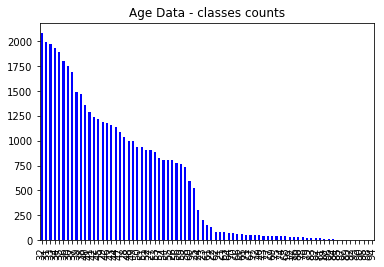

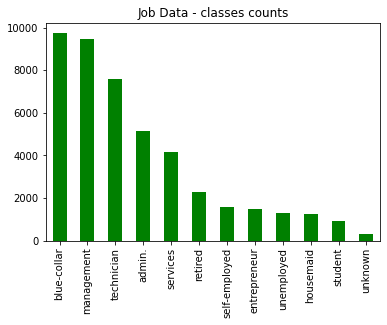

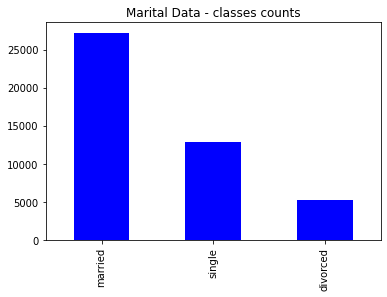

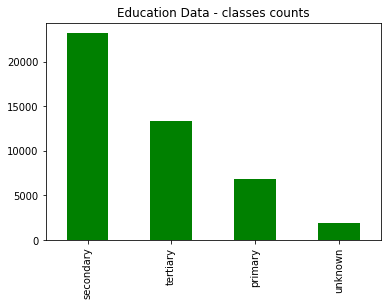

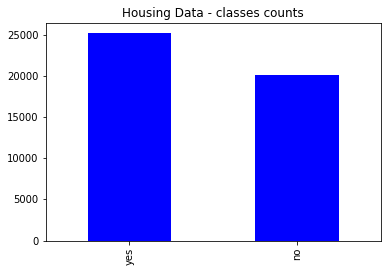

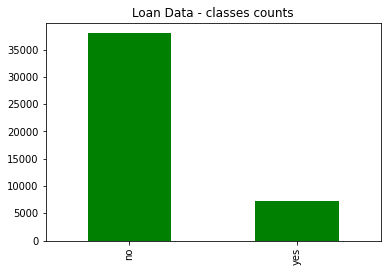

In [ ]:
# Visualisasi data

# Age
(data_age.value_counts()).plot(kind='bar', color='blue')
plt.title("Age Data - classes counts")
plt.show()

# Job
(data_job.value_counts()).plot(kind='bar', color='green')
plt.title("Job Data - classes counts")
plt.show()

# Marital
(data_marital.value_counts()).plot(kind='bar', color='blue')
plt.title("Marital Data - classes counts")
plt.show()

# Education
(data_education.value_counts()).plot(kind='bar', color='green')
plt.title("Education Data - classes counts")
plt.show()

# Housing
(data_housing.value_counts()).plot(kind='bar', color='blue')
plt.title("Housing Data - classes counts")
plt.show()

# Loan
(data_loan.value_counts()).plot(kind='bar', color='green')
plt.title("Loan Data - classes counts")
plt.show()


In [ ]:
#data kosong
data_train.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
duration     0
y            0
dtype: int64

In [ ]:
data_train.head()

,age,job,marital,education,balance,housing,loan,duration,y
0,58,management,married,tertiary,2143,yes,no,261,no
1,44,technician,single,secondary,29,yes,no,151,no
2,33,entrepreneur,married,secondary,2,yes,yes,76,no
3,47,blue-collar,married,unknown,1506,yes,no,92,no
4,33,unknown,single,unknown,1,no,no,198,no


In [ ]:
# mengubah ke angka

from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

data_train['job'] = number.fit_transform(data_train['job'].astype('str'))
angka_train = {l: i for i, l in enumerate(number.classes_)}
print(angka_train)

data_train['marital'] = number.fit_transform(data_train['marital'].astype('str'))
angka_train = {l: i for i, l in enumerate(number.classes_)}
print(angka_train)

data_train['education'] = number.fit_transform(data_train['education'].astype('str'))
angka_train = {l: i for i, l in enumerate(number.classes_)}
print(angka_train)

data_train['housing'] = number.fit_transform(data_train['housing'].astype('str'))
angka_train = {l: i for i, l in enumerate(number.classes_)}
print(angka_train)

data_train['loan'] = number.fit_transform(data_train['loan'].astype('str'))
angka_train = {l: i for i, l in enumerate(number.classes_)}
print(angka_train)

data_train['y'] = number.fit_transform(data_train['y'].astype('str'))
angka_train = {l: i for i, l in enumerate(number.classes_)}
print(angka_train)


{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
{'divorced': 0, 'married': 1, 'single': 2}
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}


In [ ]:
data_train.head()

,age,job,marital,education,balance,housing,loan,duration,y
0,58,4,1,2,2143,1,0,261,0
1,44,9,2,1,29,1,0,151,0
2,33,2,1,1,2,1,1,76,0
3,47,1,1,3,1506,1,0,92,0
4,33,11,2,3,1,0,0,198,0


In [ ]:
y = data_train.iloc[:, 8].values
X = data_train.iloc[:, 0:8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape = (8,),activation = 'sigmoid'),
    tf.keras.layers.Dense(20,activation = 'sigmoid'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 20)                2020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,941
Trainable params: 2,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Callback
callback = tf.keras.callbacks.EarlyStopping(
    #code here (contains at least : monitor, patience, restore_best_weights)
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [ ]:
 # Train the model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    epochs=50,
                    callbacks=[callback]
                   )

Epoch 1/50
1131/1131 [==============================] - 3s 3ms/step - loss: 0.2928 - accuracy: 0.8863 - val_loss: 0.2972 - val_accuracy: 0.8844
Epoch 2/50
1131/1131 [==============================] - 3s 3ms/step - loss: 0.2944 - accuracy: 0.8852 - val_loss: 0.2937 - val_accuracy: 0.8861
Epoch 3/50
1131/1131 [==============================] - 4s 3ms/step - loss: 0.2950 - accuracy: 0.8840 - val_loss: 0.2970 - val_accuracy: 0.8867
Epoch 4/50
1131/1131 [==============================] - 4s 3ms/step - loss: 0.2953 - accuracy: 0.8843 - val_loss: 0.2952 - val_accuracy: 0.8875
Epoch 5/50
1131/1131 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8839 - val_loss: 0.2925 - val_accuracy: 0.8868
Epoch 6/50
1131/1131 [==============================] - 3s 3ms/step - loss: 0.2921 - accuracy: 0.8831 - val_loss: 0.2906 - val_accuracy: 0.8827
Epoch 7/50
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2899 - accuracy: 0.8867 - val_loss: 0.2918 - val_accuracy:

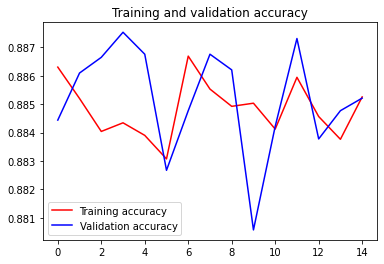

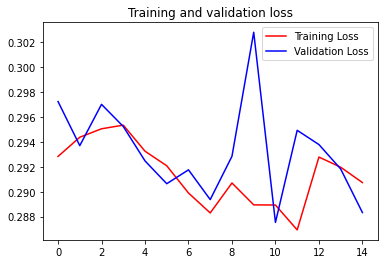

In [ ]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
prediksi = model.predict(X_test)
prediksi

array([[0.08649233],
       [0.10211378],
       [0.51843655],
       ...,
       [0.21599317],
       [0.13714814],
       [0.20218316]], dtype=float32)

In [ ]:
data_predict = np.round_(prediksi, decimals = 0, out = None)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
data_test = np.concatenate((X_test, data_test), axis=1)
data_test

array([[ 42.,   1.,   1., ...,   0., 262.,   0.],
       [ 37.,   9.,   1., ...,   0., 167.,   0.],
       [ 32.,   0.,   1., ...,   0., 819.,   1.],
       ...,
       [ 44.,  11.,   1., ...,   0., 444.,   0.],
       [ 31.,   4.,   2., ...,   0., 297.,   0.],
       [ 28.,  10.,   2., ...,   0., 203.,   0.]])

In [ ]:
data = pd.DataFrame(y_test)

In [ ]:
data.to_csv("data2.csv")